In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:
from sklearn.ensemble import RandomForestRegressor 

In [3]:
import xgboost as XGBoostRegressor

In [4]:
# now let us load the data
tr = pd.read_csv(r'C:\Users\hp\Downloads\Big Mart Sales\train (3).csv') # train data 
te = pd.read_csv(r'C:\Users\hp\Downloads\Big Mart Sales\test (2).csv') # test data

In [5]:
## this is a regression problem here we have various features as our input variable and our output sales is our target 
# column so lets begin with test data 

In [6]:
df1 = tr.copy()

In [7]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df1.shape

(8523, 12)

In [9]:
## lets look at the description of test data
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060,NaN,NaN,NaN,12.8576,4.64346,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523,NaN,NaN,NaN,0.066132,0.0515978,0,0.0269895,0.0539309,0.0945853,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523,NaN,NaN,NaN,140.993,62.2751,31.29,93.8265,143.013,185.644,266.888
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523,NaN,NaN,NaN,1997.83,8.37176,1985,1987,1999,2004,2009
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
## shape of train data is 8523 rows and 12 columns , from inital examination it seams data has some missing 
# values lets dig further

In [11]:
df1.isnull().sum()/len(df1)*100                 # on;y two columns has missing values

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
## 17 percent and 28 percent of the  values of these columns  are missing

In [13]:
from pyforest import*
lazy_imports()   ## in case if we dont feel like  impoering specific liabraries

['from sklearn import svm',
 'from dask import dataframe as dd',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import gensim',
 'import dash',
 'import plotly.graph_objs as go',
 'import re',
 'import lightgbm as lgb',
 'from openpyxl import load_workbook',
 'import datetime as dt',
 'import statistics',
 'from sklearn.manifold import TSNE',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from pathlib import Path',
 'import seaborn as sns',
 'import keras',
 'import tensorflow as tf',
 'import spacy',
 'import pickle',
 'from sklearn.preprocessing import OneHotEncoder',
 'import tqdm',
 'import bokeh',
 'from pyspark import SparkContext',
 'from sklearn.model_selection import train_test_split',
 'import sys',
 'import sklearn',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import pydot',
 'import matplotlib as mpl',
 'import plotly.express as px',
 'import os',
 'import pandas as pd'

In [14]:
# lets check the shape of test data
te.shape ,te.columns
# target column is missing we have to predivt the target column 


((5681, 11),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [15]:
te.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
# we have to do the same transformation and missing value treatement for test data as we are doing for train data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

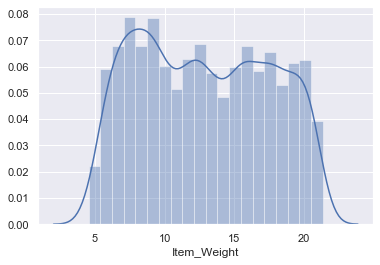

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

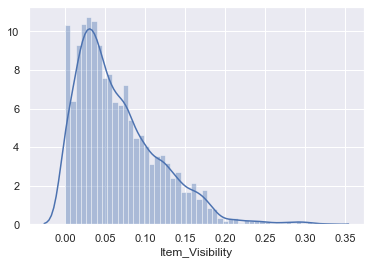

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

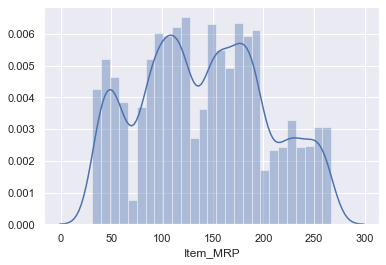

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

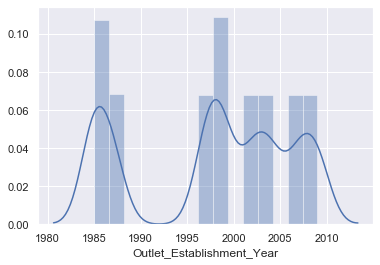

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

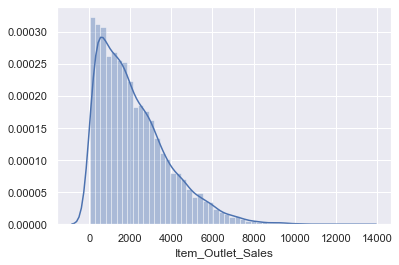

In [17]:
for i in df1.describe().columns:  ## showing only for numerical columns
    sns.distplot(df1[i].dropna())
    plt.show()

In [18]:
# item visibility , item_outlet_sales  are right skewed , others are multi model
# most items have low visibility 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

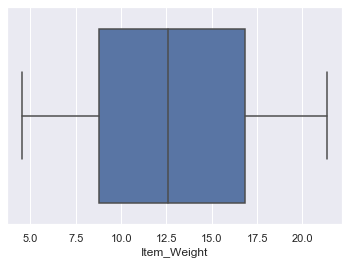

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

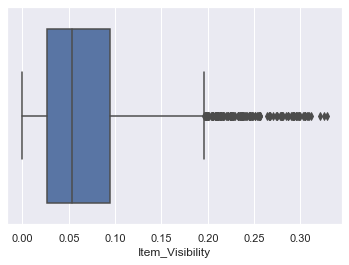

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

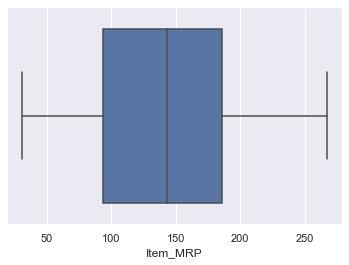

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

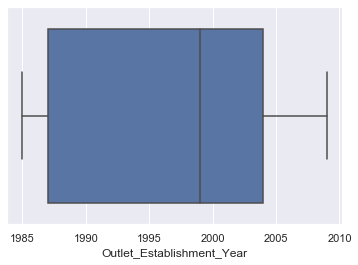

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

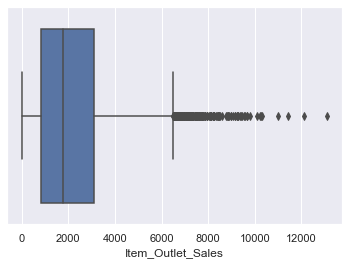

In [19]:
# lets look at the outliers in the data
for i in df1.describe().columns:  ## showing only for numerical columnns
    sns.boxplot(df1[i].dropna())
    plt.show()

In [20]:
## we have outliers in item_visibility and item_outlet sales before treating these outliers we have to look at them whether
# they are provinding any information or these are just noises
#boxplot is showing us something that displot has already confirmed
## item_visibility cannot be zero we have treat this abnormality

In [21]:
## lets make count plot for categorical values
cat_col =  df1.select_dtypes(include = 'object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

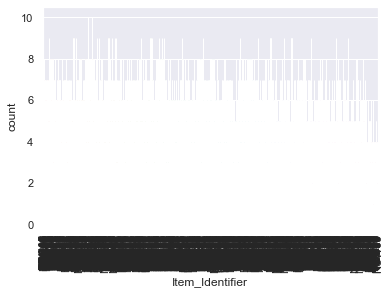

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

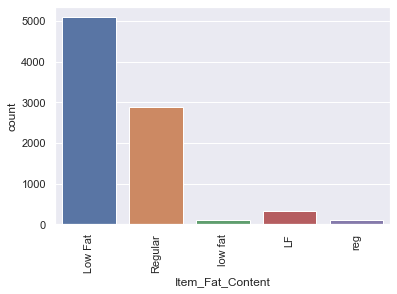

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

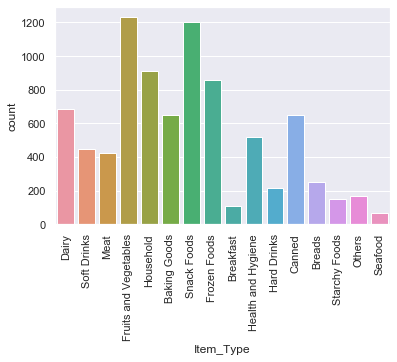

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

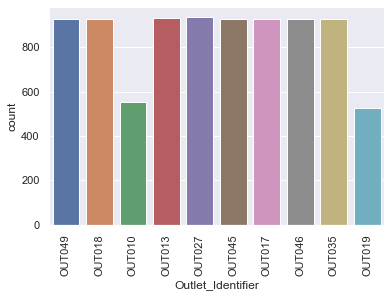

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

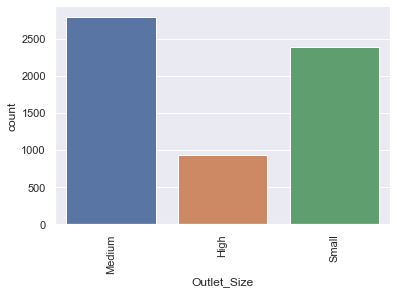

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

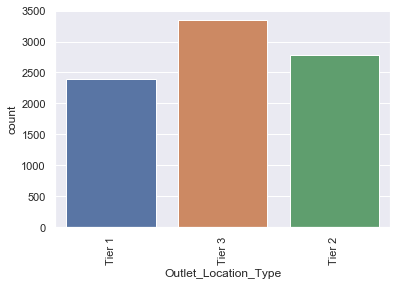

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

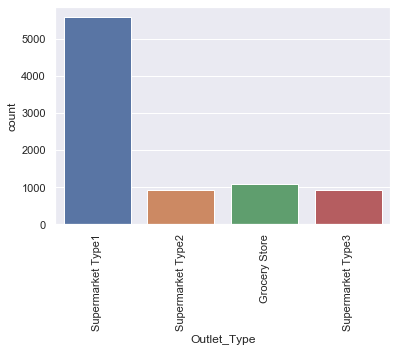

In [22]:
for i in cat_col:
    sns.countplot(cat_col[i])
    plt.xticks(rotation = 90)
    plt.show()

In [23]:
## item_identefier columns has too many unique values hence its graph is not clear
# from outlet_type we can see that  most of the outlets are located in supermarket Type 1 
#most of the outlet_location are in tier 3 cities  which is followed by Tier 2 cities
## medium outlet size has high count in our outlet_size column and large outlite size has lower count , it  may be something 
# to with availabiltiy of space or cost of space per year earning is high , might be target buyers are from middle class 
#
# fruits and vegetables , snack foods are the mose preferable products that are bought  from the  supermarts 

# our data has large number of products which contain low fat content it might be because of  pepole are more health conciouss

In [24]:
cat_col.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [25]:
for i in cat_col.drop('Item_Identifier' , axis=1).columns:
    print(i)
    print(cat_col[i].value_counts())
    

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    

In [26]:
cat_col.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [27]:
# lets check the corelation with outlet sales

In [28]:
df1.corr()['Item_Outlet_Sales']   # only for numerical columns 
#here we can Item_MRP has strong corelation  as compared to other feature

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

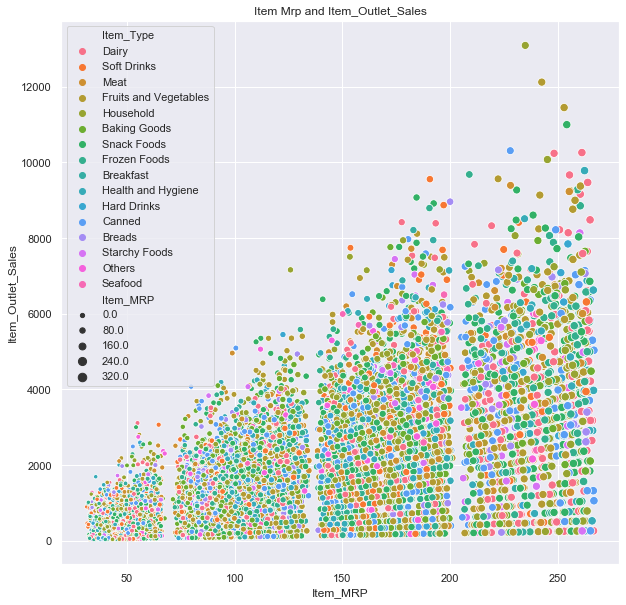

In [29]:
# lets plot some scatter plot
plt.figure(figsize = [10,10])
plt.xlabel('Item Mrp')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item Mrp and Item_Outlet_Sales')
sns.scatterplot(x ='Item_MRP' , y = 'Item_Outlet_Sales' ,hue = 'Item_Type' ,size =  'Item_MRP' , data = df1 )
plt.show()

In [30]:
## here we can see strong corelation led to heteroscadicity , wjich shoulf be avoided if we are following  supervised regression 
#problen  , this unequal scatter means scateering of residual is uneven as the variable takes the higher value 
# there is no constant variance , we can do transformation on target variable o avoid homoscadsity

In [31]:
df1_num = df1.select_dtypes(exclude = 'object')
df1_num .columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

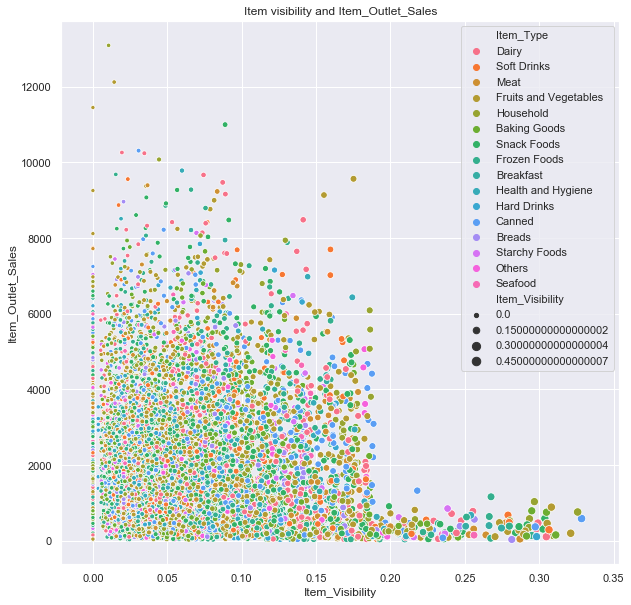

In [32]:
## lets item visibiltiy vs item outlet sales
plt.figure(figsize = [10,10])
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item visibility and Item_Outlet_Sales')
sns.scatterplot(x ='Item_Visibility' , y = 'Item_Outlet_Sales' ,hue = 'Item_Type' ,size =  'Item_Visibility' , data = df1 )
plt.show()

In [33]:
# there is not a strong corelation between outlet sales and item visibility , also we can not see any linear pattern over here
## here we can obserce lower the visibility higher the outlet sales , most of the values are 
#aggregated in lower region of item visibility

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

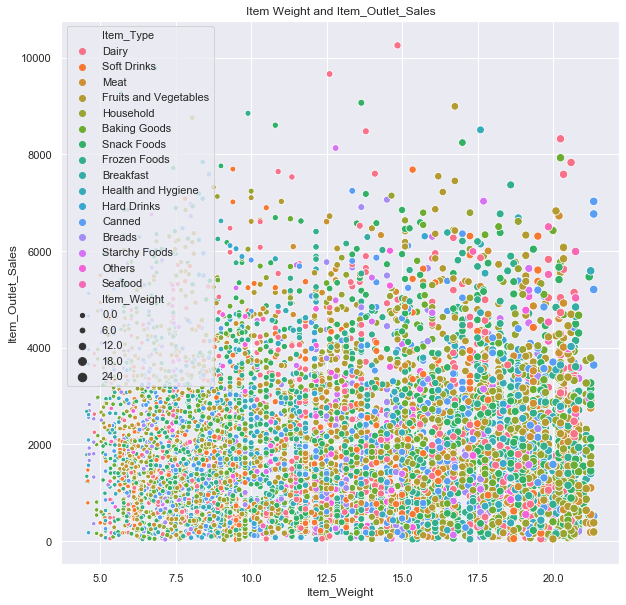

In [34]:
# item weight vs outlet sales 
plt.figure(figsize = [10,10])
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item Weight and Item_Outlet_Sales')
sns.scatterplot(x ='Item_Weight' , y = 'Item_Outlet_Sales' ,hue = 'Item_Type' ,size =  'Item_Weight' , data = df1 )
plt.show()


In [35]:
## weak corelation , no pattern to be found , item_weight has nothing to do with item_outlet_sales

In [36]:
df1_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

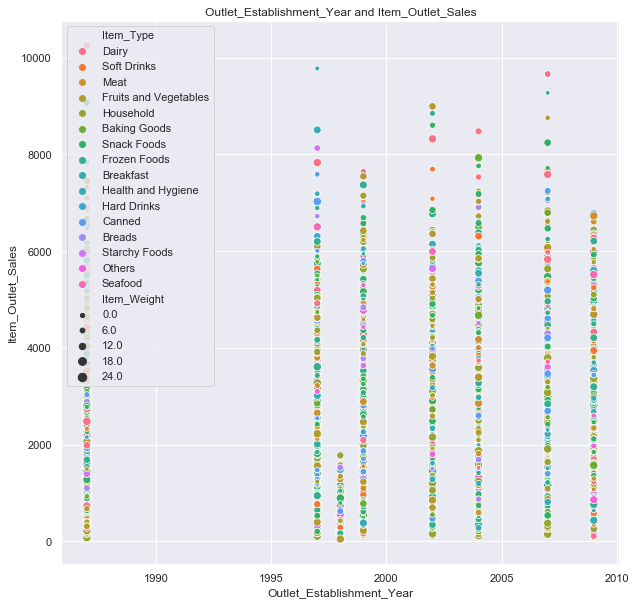

In [37]:
# does establishment year has any impact over outlet_sales 
plt.figure(figsize = [10,10])
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Establishment_Year and Item_Outlet_Sales')
sns.scatterplot(x ='Outlet_Establishment_Year' , y = 'Item_Outlet_Sales' ,hue = 'Item_Type' ,size =  'Item_Weight' , data = df1 )
plt.show()

In [38]:
### as the year values are discreate in nature hence this kind of graph was expected , but no conclusion can be drawn from 
 # this visulization

In [39]:
## let look at the catgorical columns in relation to item outlet sales

In [40]:
cat_col.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

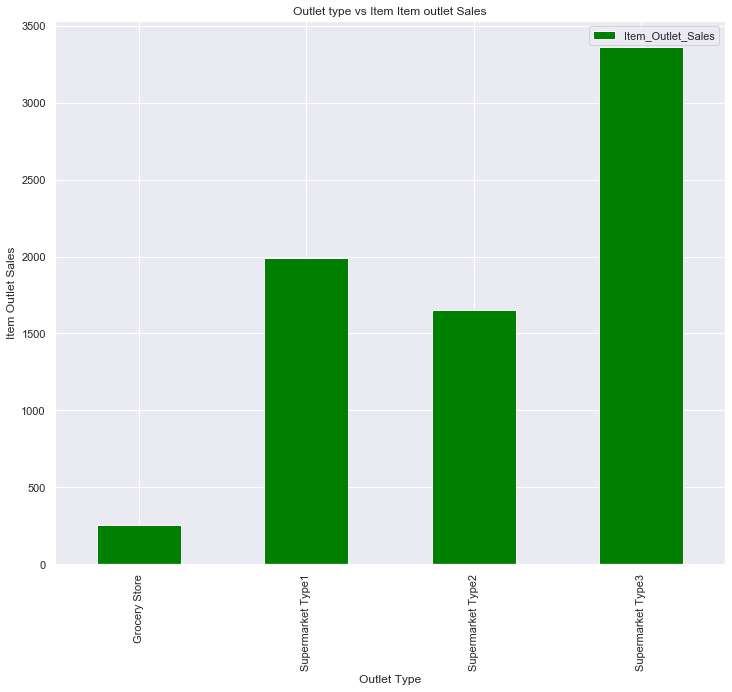

In [41]:
## outlet type  vs item_outlet sales

a = df1.pivot_table(index = 'Outlet_Type'  , values ='Item_Outlet_Sales' , aggfunc = np.median)
a.plot(kind = 'bar' , color = 'green' , figsize = [12,10])
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet type vs Item Item outlet Sales')
plt.show()

In [42]:
cat_col['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [43]:
# OPPOSITE to number of stores  supermarket type 3 has high sales  compare to supermarket type 1 , may be supermarket type 3 
# located at some strategic location  , hence outlet count has nothing to do with outlet sales

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

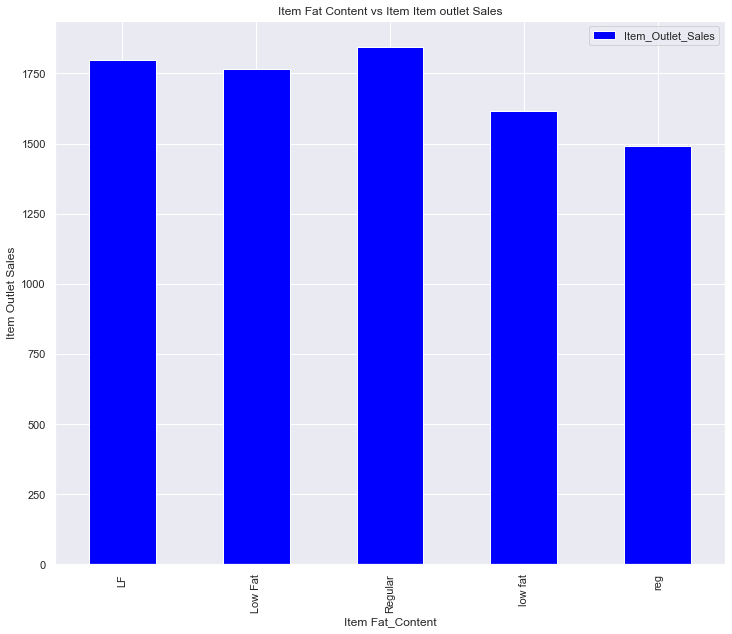

In [44]:
 ## item_fat_content  vs item_outlet sales

b = df1.pivot_table(index = 'Item_Fat_Content'  , values ='Item_Outlet_Sales' , aggfunc = np.median)
b.plot(kind = 'bar' , color = 'blue' , figsize = [12,10])
plt.xlabel('Item Fat_Content')
plt.ylabel('Item Outlet Sales')
plt.title('Item Fat Content vs Item Item outlet Sales')
plt.show()

In [45]:
## here we can identify that Low fat ,LF , low fat are  one or the same thing and so as the Regular and reg lets corect it


In [46]:
df1.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [47]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace({'LF' :'Low Fat' ,'low fat': 'Low Fat' , 'reg':'Regular' })

In [48]:
df1['Item_Fat_Content'].value_counts() ## now we are getting the true values

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

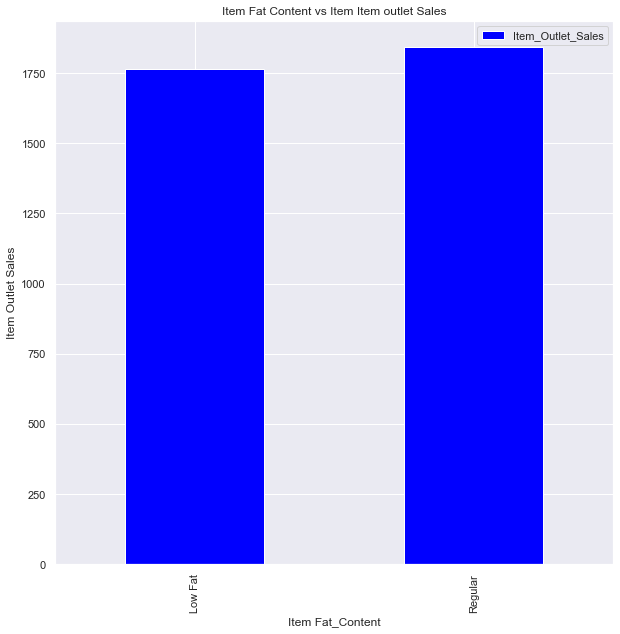

In [49]:
## lets plot the correct plot
b = df1.pivot_table(index = 'Item_Fat_Content'  , values ='Item_Outlet_Sales' , aggfunc = np.median)
b.plot(kind = 'bar' , color = 'blue' , figsize = [10,10])
plt.xlabel('Item Fat_Content')
plt.ylabel('Item Outlet Sales')
plt.title('Item Fat Content vs Item Item outlet Sales')
plt.show()
# regular fat content has slightly greater sale value

In [50]:
## lets see if same thing is present test data , if yes then lets remove it
te['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [51]:
te['Item_Fat_Content'] = te['Item_Fat_Content'].replace ({'LF' :'Low Fat' ,'low fat': 'Low Fat' , 'reg':'Regular' })

In [52]:
te['Item_Fat_Content'].value_counts() 

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

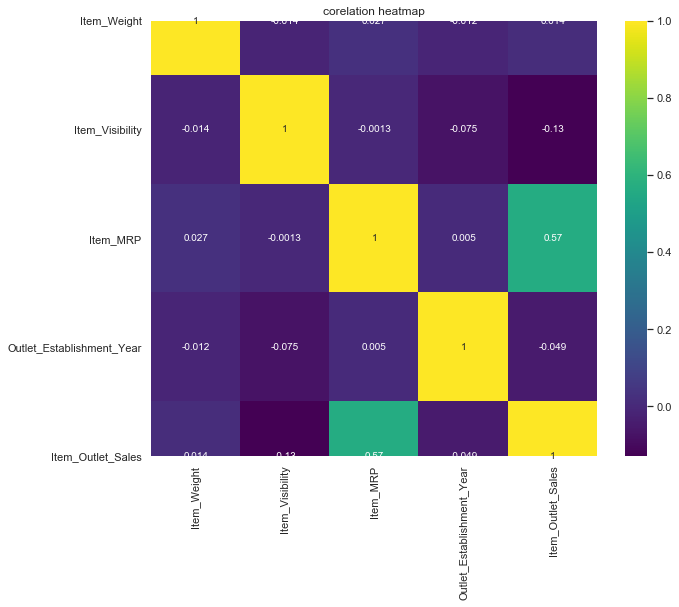

In [53]:
plt.figure(figsize = [10,8])
sns.heatmap(df1.corr() , annot = True , cmap = 'viridis')
plt.title('corelation heatmap')
plt.show()

In [54]:
df1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [55]:
## higher the item visibility lower the sales as we can see that c , there is negative corelation netween item_visibility 
# and item outlet sales , thats we we saw higher visibility item has less sales value in scatter plot
# item_weight and item_mrp has low posetive corelation  
# item weight and item mrp have very weak corelation 


In [56]:
## now we hve null values in our data and we know that  these claues has to be treated 
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
#  in numericl column we can treat the missing values with mean ,  median and in categorical column we cant treat the  values 
# with mode , in case of numerical column we can perform the imputation with the help of Knn imputer , but  for categorical column 
## we need to convert it to numerical by the help of different encoding techniques

In [58]:
# lets concat the test and  train data so we can perform impputation 
# let us make one column in each datacto identify between train and test data


### feature engineering and null value removal

In [59]:
df1['status'] = 'train' 

In [60]:
df1.status.value_counts()

train    8523
Name: status, dtype: int64

In [61]:
te['status'] = 'test' 
te.status.value_counts()

test    5681
Name: status, dtype: int64

In [62]:
## as the number of rows are low we should perform knn imputer

In [63]:
df_fin = pd.concat([df1 , te] , axis =0)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [64]:
from sklearn.impute import KNNImputer
knn = KNNImputer()

In [65]:
df_fin.shape

(14204, 13)

In [66]:
df_fin.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
status                          0
dtype: int64

In [67]:
# we dont want knn imputer to use item outlet sales hence when we will run the imputer we will exclude the target column

In [68]:
df_fin.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'status'],
      dtype='object')

In [69]:
df_fin1 = df_fin.drop('Item_Outlet_Sales',axis=1)

In [70]:
# now seperate the numerical columns and run the imputer
num_col = df_fin1.select_dtypes(exclude = 'object')
num_col.shape

(14204, 4)

In [71]:
num_data = knn.fit_transform(num_col)
num_data =pd.DataFrame(num_data ,  columns = num_col.columns)

<IPython.core.display.Javascript object>

In [72]:
num_data.isnull().sum()

Item_MRP                     0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
dtype: int64

In [73]:
num_col.shape

(14204, 4)

In [74]:
num_data.shape

(14204, 4)

In [75]:
num_data.reset_index(drop=True, inplace=True)

In [76]:
num_data.Item_Weight.mean() # after imputation 

12.794186567164852

In [77]:
df1.Item_Weight.mean() ## for train   , before imputation 

12.857645184136183

In [78]:
te.Item_Weight.mean()   ## as we can there is not much of variance in terms of mean  after and before imputation

12.695633368756374

In [79]:
# we can see there is no missing values

In [80]:
# now in cat_col
cat_col1 = df_fin1.select_dtypes(include  = 'object')
cat_col1.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'status'],
      dtype='object')

In [81]:
cat_col1.isnull().sum()
## outlet size has missing values

Item_Fat_Content           0
Item_Identifier            0
Item_Type                  0
Outlet_Identifier          0
Outlet_Location_Type       0
Outlet_Size             4016
Outlet_Type                0
status                     0
dtype: int64

In [82]:
cat_col1.Outlet_Size .value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [83]:
# we can use most frequent values to fill the null values or we can use  ffill or backfill 

In [84]:
cat_col1.Outlet_Size = cat_col1.Outlet_Size.fillna(cat_col1.Outlet_Size.mode()[0])  

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [85]:
cat_col1.isnull().sum()

Item_Fat_Content        0
Item_Identifier         0
Item_Type               0
Outlet_Identifier       0
Outlet_Location_Type    0
Outlet_Size             0
Outlet_Type             0
status                  0
dtype: int64

In [86]:
cat_col1.shape

(14204, 8)

In [87]:
cat_col1.reset_index(drop=True, inplace=True)

In [89]:
df_fin2 = pd.concat([num_data , cat_col1] , axis =1)

<IPython.core.display.Javascript object>

In [90]:
df_fin2.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [91]:
df_fin2.shape

(14204, 12)

In [92]:
df_fin.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'status'],
      dtype='object')

In [93]:
## adding target variable 
#df_fin2['Item_Outlet_Sales'] = df_fin['Item_Outlet_Sales']

In [94]:
df_fin2.shape


(14204, 12)

In [95]:
# as we have spoted that item_visibility was zero in case of some items , which can not be true lets see how many 0
# values we have in our item visibility column

In [96]:
df_fin2[df_fin2['Item_Visibility'] == 0]['Item_Visibility'].count() 
## 879 enntries with zero visibiltiy ,also item_visibility is skewed in nature it is needed to be transformed

879

In [97]:
# lets replace 0 with median values
df_fin2['Item_Visibility'] =  df_fin2['Item_Visibility'].replace({0:np.median(0)})

<IPython.core.display.Javascript object>

In [98]:
df_fin2[df_fin2['Item_Visibility'] == 0]['Item_Visibility'].count()  ## check again 


879

In [99]:
## outlet establishment years

In [100]:
df_fin2['Outlet_Establishment_Year'].value_counts()
# latest value is 2009  , and we can subtract outlet establishment years from 2009 so that we can find that 
# number of year since its establishment

1985.0    2439
1987.0    1553
2004.0    1550
1999.0    1550
1997.0    1550
2002.0    1548
2009.0    1546
2007.0    1543
1998.0     925
Name: Outlet_Establishment_Year, dtype: int64

In [101]:
df_fin2['number_of_years'] = 2009 - df_fin2['Outlet_Establishment_Year']  # new columns

In [102]:
df_fin2['number_of_years'].value_counts()

24.0    2439
22.0    1553
5.0     1550
12.0    1550
10.0    1550
7.0     1548
0.0     1546
2.0     1543
11.0     925
Name: number_of_years, dtype: int64

In [103]:
df_fin2['number_of_years'].describe()
## mean number of year since establishment is 11 , variation is 8.3 , with min establishment year is 0 
# and max is 24

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: number_of_years, dtype: float64

In [104]:
df_fin2.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Identifier',
       'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type', 'status', 'number_of_years'],
      dtype='object')

In [105]:
## count of item_identifier
df_fin2.Item_Type.value_counts()  
# we can see there are  16 items 

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [106]:
# now lets look at the value of item_identifier values 
df_fin2['Item_Identifier'].value_counts()
## we can see that length ios 1559  and items are 16 only , if we didnot reduce these we will face the diamensionality curse 
# i.e there will be too many diamension when we will perform encoding  to convert categorical values in to numerical values

NCC07    10
FDC37    10
NCC54    10
FDH04    10
FDT46    10
         ..
DRN11     7
NCW54     7
FDO33     7
NCL42     7
FDM50     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [107]:
l = []
for i in df_fin2['Item_Identifier']:
    l.append(i[0:2])
 

In [108]:
l = set(l)
l
## we can see there  are only first two characters which are unique hence we group variaous items on the basis of these 3 
# unique category

{'DR', 'FD', 'NC'}

In [109]:
## we can see FD is used for food items and  NC for non consumable items DR for beverages 
# now let make new item identifier and add that into our  data

In [110]:
# introducing a new feature , which will havwe first two initials of item_identifier
df_fin2['New_Item_Identifier'] = df_fin2['Item_Identifier'].apply(lambda x :x[0:2])

In [111]:
## lets check our new feature
df_fin2['New_Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_Identifier, dtype: int64

In [112]:
df_fin2.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Identifier',
       'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type', 'status', 'number_of_years', 'New_Item_Identifier'],
      dtype='object')

In [113]:
## lets replace them with more meaning full name
df_fin2['New_Item_Identifier'] = df_fin2['New_Item_Identifier'].map({'FD':'Food' , 'NC' : 'Non-Consumable' , 'DR' : 'Beverage'})
df_fin2['New_Item_Identifier'].value_counts()

Food              10201
Non-Consumable     2686
Beverage           1317
Name: New_Item_Identifier, dtype: int64

In [114]:
##now if a product is non- consumable then there should be no fat content associated with , it should be non edible  
df_fin2.loc[df_fin2['New_Item_Identifier']== 'Non-Consumable' , 'Item_Fat_Content'] = 'Non-Edible'

In [115]:
df_fin2['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [116]:
# the item which is non consumable we cant have fat content in it 

In [117]:
# item_visibility 
# usually product that has high item visibility will have high sales compare to other products , now  based on this hypothesis
# we can create a feature  in which importance given to the product  in a given store acording to average significance given 
# to same product in a differnt store

In [118]:
df_fin2.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Identifier',
       'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type', 'status', 'number_of_years', 'New_Item_Identifier'],
      dtype='object')

In [119]:
df_fin2['Item_Weight'].median(0)

12.6

In [120]:
item_vis_avg = df_fin2.pivot_table(values ='Item_Visibility' , index = 'Item_Identifier'  )

In [121]:
item_vis_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [122]:
func = lambda x:x['Item_Visibility']/item_vis_avg['Item_Visibility'][item_vis_avg.index == x['Item_Identifier']][0]

In [123]:
df_fin2['Item_vsi_avg'] = df_fin2.apply(func ,axis=1).astype(float)

In [124]:
df_fin2.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,status,number_of_years,New_Item_Identifier,Item_vsi_avg
0,249.8092,0.016047,9.30,1999.0,Low Fat,FDA15,Dairy,OUT049,Tier 1,Medium,Supermarket Type1,train,10.0,Food,0.931078
1,48.2692,0.019278,5.92,2009.0,Regular,DRC01,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2,train,0.0,Beverage,0.933420
2,141.6180,0.016760,17.50,1999.0,Low Fat,FDN15,Meat,OUT049,Tier 1,Medium,Supermarket Type1,train,10.0,Food,0.960069
3,182.0950,0.000000,19.20,1998.0,Regular,FDX07,Fruits and Vegetables,OUT010,Tier 3,Medium,Grocery Store,train,11.0,Food,0.000000
4,53.8614,0.000000,8.93,1987.0,Non-Edible,NCD19,Household,OUT013,Tier 3,High,Supermarket Type1,train,22.0,Non-Consumable,0.000000


### Label encoding for Categorical Columns

In [125]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [126]:
df_fin2.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Identifier',
       'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type', 'status', 'number_of_years', 'New_Item_Identifier',
       'Item_vsi_avg'],
      dtype='object')

In [127]:
# new variable for outlet_identifier after transformation
df_fin2['outlet'] = label.fit_transform(df_fin2['Outlet_Identifier'] )   #example

In [128]:
var= ['Item_Fat_Content','Outlet_Location_Type' ,'Outlet_Size','New_Item_Identifier','Outlet_Type','outlet']
for i in var:
    df_fin2[i] = label.fit_transform(df_fin2[i])

In [129]:
df_fin2.head()   #and we transformed it

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,status,number_of_years,New_Item_Identifier,Item_vsi_avg,outlet
0,249.8092,0.016047,9.30,1999.0,0,FDA15,Dairy,OUT049,0,1,1,train,10.0,1,0.931078,9
1,48.2692,0.019278,5.92,2009.0,2,DRC01,Soft Drinks,OUT018,2,1,2,train,0.0,0,0.933420,3
2,141.6180,0.016760,17.50,1999.0,0,FDN15,Meat,OUT049,0,1,1,train,10.0,1,0.960069,9
3,182.0950,0.000000,19.20,1998.0,2,FDX07,Fruits and Vegetables,OUT010,2,1,0,train,11.0,1,0.000000,0
4,53.8614,0.000000,8.93,1987.0,1,NCD19,Household,OUT013,2,0,1,train,22.0,2,0.000000,1


In [130]:
# now to remove the biaseness that algorithm will create because of label encoding we will use get_dummies to convert
#it into 0 ,1 format ,or  we could have done it earlier , its for explanatio only

In [131]:
df_fin2 = pd.get_dummies( df_fin2 , columns = ['Item_Fat_Content','Outlet_Location_Type' ,'Outlet_Size','New_Item_Identifier','Outlet_Type','outlet'])
df_fin2.info() #lets check the values

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 36 columns):
Item_MRP                     14204 non-null float64
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null float64
Item_Identifier              14204 non-null object
Item_Type                    14204 non-null object
Outlet_Identifier            14204 non-null object
status                       14204 non-null object
number_of_years              14204 non-null float64
Item_vsi_avg                 14204 non-null float64
Item_Fat_Content_0           14204 non-null uint8
Item_Fat_Content_1           14204 non-null uint8
Item_Fat_Content_2           14204 non-null uint8
Outlet_Location_Type_0       14204 non-null uint8
Outlet_Location_Type_1       14204 non-null uint8
Outlet_Location_Type_2       14204 non-null uint8
Outlet_Size_0                14204 non-null uint8
Outlet_Size_1            

### Model building

In [132]:
df_fin2.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Item_Identifier', 'Item_Type',
       'Outlet_Identifier', 'status', 'number_of_years', 'Item_vsi_avg',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'New_Item_Identifier_0', 'New_Item_Identifier_1',
       'New_Item_Identifier_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'outlet_0', 'outlet_1', 'outlet_2',
       'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8',
       'outlet_9'],
      dtype='object')

In [133]:
df_fin2 = df_fin2.drop(['Item_Type' , 'Outlet_Establishment_Year'] , axis=1) ## we have created new item identifier , to replace
# item_type , remember food, beverages and non consumables . outlet establishment year is of no use as we we have created number of years

In [134]:
train = df_fin2.loc[df_fin2['status'] == 'train']
test = df_fin2.loc[df_fin2['status'] == 'test']

In [135]:
print(train['status'].unique()) ## lets check
print(test['status'].unique()) 

['train']
['test']


In [136]:
## now drop this column
train = train.drop('status' , axis=1)

In [137]:
test.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Identifier',
       'Outlet_Identifier', 'status', 'number_of_years', 'Item_vsi_avg',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'New_Item_Identifier_0', 'New_Item_Identifier_1',
       'New_Item_Identifier_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'outlet_0', 'outlet_1', 'outlet_2',
       'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8',
       'outlet_9'],
      dtype='object')

In [138]:
test = test.drop(['status' ] , axis=1)

In [139]:
train.shape

(8523, 33)

In [140]:
test.shape  

(5681, 33)

In [141]:
train.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Identifier',
       'Outlet_Identifier', 'number_of_years', 'Item_vsi_avg',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'New_Item_Identifier_0', 'New_Item_Identifier_1',
       'New_Item_Identifier_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'outlet_0', 'outlet_1', 'outlet_2',
       'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8',
       'outlet_9'],
      dtype='object')

In [142]:
X_train = train.drop([ 'Item_Identifier' , 'Outlet_Identifier' ],axis =1)   ## same with item_identifier
# outlet_identifier these are redundant column as we have extracted  usefull feature from them
y_train = df1['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier' , 'Outlet_Identifier'] ,axis =1).copy()

In [143]:
X_train.isnull().sum()   # cross check

Item_MRP                  0
Item_Visibility           0
Item_Weight               0
number_of_years           0
Item_vsi_avg              0
Item_Fat_Content_0        0
Item_Fat_Content_1        0
Item_Fat_Content_2        0
Outlet_Location_Type_0    0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Size_0             0
Outlet_Size_1             0
Outlet_Size_2             0
New_Item_Identifier_0     0
New_Item_Identifier_1     0
New_Item_Identifier_2     0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
outlet_0                  0
outlet_1                  0
outlet_2                  0
outlet_3                  0
outlet_4                  0
outlet_5                  0
outlet_6                  0
outlet_7                  0
outlet_8                  0
outlet_9                  0
dtype: int64

In [144]:
X_test.isnull().sum()  # cross check

Item_MRP                  0
Item_Visibility           0
Item_Weight               0
number_of_years           0
Item_vsi_avg              0
Item_Fat_Content_0        0
Item_Fat_Content_1        0
Item_Fat_Content_2        0
Outlet_Location_Type_0    0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Size_0             0
Outlet_Size_1             0
Outlet_Size_2             0
New_Item_Identifier_0     0
New_Item_Identifier_1     0
New_Item_Identifier_2     0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
outlet_0                  0
outlet_1                  0
outlet_2                  0
outlet_3                  0
outlet_4                  0
outlet_5                  0
outlet_6                  0
outlet_7                  0
outlet_8                  0
outlet_9                  0
dtype: int64

### Linear regression 

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
lr = LinearRegression()

In [147]:
lr.fit(X_train , y_train)

LinearRegression()

In [148]:
lr_pred = lr.predict(X_test)

In [149]:
acc_score = round(lr.score(X_train , y_train) *100)
acc_score   
## not a good score

56

### Decision Tree

In [150]:
# random decison tree


In [151]:
from sklearn .tree import DecisionTreeRegressor   ## decision tree works better for classification problem lets just check
# it 
dt_mod= DecisionTreeRegressor(criterion='mse' ,  max_depth = 15 , min_samples_leaf = 100 , random_state =0)  # paramaters are random

In [152]:
dt_mod.fit(X_train , y_train)
dt_mod_pred = dt_mod.predict(X_test)

In [153]:
dt_mod_acc = round(dt_mod.score(X_train ,y_train )*100)
dt_mod_acc 
## there have been slight improvement in score 

62

In [154]:
## regularized decision tree 
from sklearn.model_selection import GridSearchCV ,KFold

In [155]:
# kf =KFold(shuffle  = True  , n_splits  = 5 , random_state = 0)
# param  = {'max_depth' : np.arange(1,15) , 'criterion' : ["mse", "friedman_mse", "mae"]}
# GS = GridSearchCV(dt_mod , param , cv = kf , scoring = 'neg_mean_squared_error' )
# GS.fit(X_train ,y_train)

In [156]:
GS.best_params_   # without scoring

NameError: name 'GS' is not defined

In [157]:
GS.best_params_

NameError: name 'GS' is not defined

In [162]:
dt_mod1= DecisionTreeRegressor(criterion='mse' ,  max_depth = 6 , min_samples_leaf = 100 , random_state =0)  # paramaters are random

In [163]:
dt_mod1.fit(X_train , y_train)
dt_mod_pred = dt_mod1.predict(X_test)

In [164]:
dt_mod_acc = round(dt_mod.score(X_train ,y_train )*100)
dt_mod_acc

62

In [165]:
dt_mod2 = DecisionTreeRegressor(criterion='friedman_mse' ,  max_depth = 6 , min_samples_leaf = 100 , random_state =0)  # paramaters are random

In [166]:
dt_mod1.fit(X_train , y_train)
dt_mod_pred = dt_mod1.predict(X_test)

In [167]:
dt_mod_acc = round(dt_mod.score(X_train ,y_train )*100)
dt_mod_acc

62

In [168]:
## no differece has been found  been found even after  hyper parameter tunning

### Random Forest 

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
rf = RandomForestRegressor(random_state =0)

In [171]:
rf.fit(X_train , y_train)

RandomForestRegressor(random_state=0)

In [172]:
rf_pred = rf.predict(X_test)

In [173]:
score = round(rf.score(X_train , y_train)*100)

score
## thats quite an improvement in train socre

94

### xgboost regressor

In [174]:
from xgboost import XGBRegressor

In [175]:
xgr = XGBRegressor(random_state =100)

In [176]:
xgr.fit(X_train , y_train )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
xgr_pred = xgr.predict(X_test )

In [178]:
xgr_score = round(xgr.score(X_train , y_train )*100)
xgr_score


85

####  here we cant do much as we dont have ytest  to draw the comparision between our predicted and actual output
#### so we are using train score only

### now lets split the train data into train ,test ,split and  see what we get

In [211]:
X =  train.drop([ 'Item_Identifier' , 'Outlet_Identifier' ],axis =1) 
y_train = df1['Item_Outlet_Sales']


In [212]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 31 columns):
Item_MRP                  8523 non-null float64
Item_Visibility           8523 non-null float64
Item_Weight               8523 non-null float64
number_of_years           8523 non-null float64
Item_vsi_avg              8523 non-null float64
Item_Fat_Content_0        8523 non-null uint8
Item_Fat_Content_1        8523 non-null uint8
Item_Fat_Content_2        8523 non-null uint8
Outlet_Location_Type_0    8523 non-null uint8
Outlet_Location_Type_1    8523 non-null uint8
Outlet_Location_Type_2    8523 non-null uint8
Outlet_Size_0             8523 non-null uint8
Outlet_Size_1             8523 non-null uint8
Outlet_Size_2             8523 non-null uint8
New_Item_Identifier_0     8523 non-null uint8
New_Item_Identifier_1     8523 non-null uint8
New_Item_Identifier_2     8523 non-null uint8
Outlet_Type_0             8523 non-null uint8
Outlet_Type_1             8523 non-null uint8
Outlet_Ty

In [462]:
X.describe()

,Item_MRP,Item_Visibility,Item_Weight,number_of_years,Item_vsi_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,outlet_0,outlet_1,outlet_2,outlet_3,outlet_4,outlet_5,outlet_6,outlet_7,outlet_8,outlet_9
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,140.992782,0.066132,12.845285,11.168133,1.001312,0.459697,0.187610,0.352693,0.280183,0.326763,...,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,62.275067,0.051598,4.327059,8.371760,0.350961,0.498402,0.390423,0.477836,0.449115,0.469057,...,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,31.290000,0.000000,4.555000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.826500,0.026989,9.264500,5.000000,0.922116,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,143.012800,0.053931,12.600000,10.000000,0.960898,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,185.643700,0.094585,16.250000,22.000000,1.042001,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,266.888400,0.328391,21.350000,24.000000,3.010094,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [213]:
sc= StandardScaler()

In [214]:
xtrain ,xtest , ytrain ,ytest = train_test_split(X , y  , test_size = 0.25 , random_state =0)

<IPython.core.display.Javascript object>

In [215]:
xtrain.shape ,xtest.shape , ytrain.shape ,ytest.shape 

((6392, 31), (2131, 31), (6392,), (2131,))

In [216]:
#let us scale our data

In [217]:
xsc = sc.fit_transform(xtrain)

In [218]:
xtrain.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'number_of_years',
       'Item_vsi_avg', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'New_Item_Identifier_0',
       'New_Item_Identifier_1', 'New_Item_Identifier_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'outlet_0',
       'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6',
       'outlet_7', 'outlet_8', 'outlet_9'],
      dtype='object')

In [219]:
xsc = pd.DataFrame(xsc  , columns = xtrain.columns)

<IPython.core.display.Javascript object>

In [221]:
xtsc = pd.DataFrame(sc.transform(xtest) , columns = xtest.columns)

<IPython.core.display.Javascript object>

In [223]:
xtsc.describe()### data is scaled we can , now its good for non linear models , for linear models
# we firest need to check the assumptions

,Item_MRP,Item_Visibility,Item_Weight,number_of_years,Item_vsi_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,outlet_0,outlet_1,outlet_2,outlet_3,outlet_4,outlet_5,outlet_6,outlet_7,outlet_8,outlet_9
count,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,...,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000
mean,0.027149,-0.000554,-0.045003,0.005363,-0.006229,0.014298,-0.006078,-0.009929,-0.051330,0.022282,...,0.023662,0.032352,-0.015063,-0.010067,-0.012942,0.000446,0.037512,0.011532,-0.062060,-0.001058
std,0.991645,1.005191,0.994962,1.002930,1.014851,1.001340,0.995355,0.997146,0.974263,1.008327,...,1.041401,1.040098,0.981138,0.987526,0.976527,1.000791,1.046415,1.014622,0.919697,0.998907
min,-1.751251,-1.283487,-1.925125,-1.333665,-2.865277,-0.919094,-0.481494,-0.740067,-0.632871,-0.692553,...,-0.260775,-0.345884,-0.351247,-0.350966,-0.258716,-0.350966,-0.344749,-0.348148,-0.358790,-0.350122
25%,-0.717065,-0.762301,-0.853947,-0.735980,-0.229689,-0.919094,-0.481494,-0.740067,-0.632871,-0.692553,...,-0.260775,-0.345884,-0.351247,-0.350966,-0.258716,-0.350966,-0.344749,-0.348148,-0.358790,-0.350122
50%,0.045022,-0.252095,-0.090964,-0.138294,-0.118216,-0.919094,-0.481494,-0.740067,-0.632871,-0.692553,...,-0.260775,-0.345884,-0.351247,-0.350966,-0.258716,-0.350966,-0.344749,-0.348148,-0.358790,-0.350122
75%,0.730585,0.592307,0.740123,1.296151,0.117168,1.088028,-0.481494,1.351228,1.580101,1.443933,...,-0.260775,-0.345884,-0.351247,-0.350966,-0.258716,-0.350966,-0.344749,-0.348148,-0.358790,-0.350122
max,2.019518,4.696339,1.952124,1.535225,5.712428,1.088028,2.076869,1.351228,1.580101,1.443933,...,3.834731,2.891144,2.847001,2.849281,3.865249,2.849281,2.900663,2.872344,2.787145,2.856150


### lets deploy OLS models  , so that we can  check the basic static test

In [231]:
x_new = sc.fit_transform(X) 

In [232]:
x_new = pd.DataFrame(x_new , columns = X.columns)

<IPython.core.display.Javascript object>

In [233]:
import statsmodels.api  as sm 
inpc = sm.add_constant(x_new )
ols = sm.OLS(y , inpc)
ols_mod = ols.fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [234]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     686.4
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:56:53   Log-Likelihood:                -71990.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8506   BIC:                         1.441e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2181.2889     12.224    178.449      0.000    2157.328    2205.250
Item_MRP                 968.7131     12.247     79.099      0.000     944.706     992.720
Item_Visibility          -14.2891     13.547     -1.055      0.292     -40.845      12.267
Item_Weight               -0.9002     12.257     -0.073      0.941     -24.928      23.127
number_of_years           38.8270      3.933      9.872      0.000      31.117      46.537
Item_vsi_avg              -5.1790     16.051     -0.323      0.747     -36.643      26.285
Item_Fat_Content_0        -7.5543      6.810     -1.109      0.267     -20.903       5.795
Item_Fat_Content_1        -5.9245      4.456     -1.330      0.184     -14.659       2.810
Item_Fat_Content_2        12.7201      7.426      1.713      0.087      -1.837      27.277
Outlet_Location_Type_0   -36.6145      4.488     -8.158      0.000     -45.412     -27.817
Outlet_Location_Type_1    21.1138      4.166      5.068      0.000      12.947      29.281
Outlet_Location_Type_2    13.3902      3.535      3.788      0.000       6.461      20.320
Outlet_Size_0             -6.1911      4.304     -1.439      0.150     -14.627       2.245
Outlet_Size_1             26.8625      4.006      6.706      0.000      19.010      34.715
Outlet_Size_2            -24.8665      4.253     -5.847      0.000     -33.203     -16.530
New_Item_Identifier_0     -1.1640      9.628     -0.121      0.904     -20.037      17.709
New_Item_Identifier_1      5.8982      5.791      1.018      0.309      -5.454      17.251
New_Item_Identifier_2     -5.9245      4.456     -1.330      0.184     -14.659       2.810
Outlet_Type_0           -298.5500      6.265    -47.651      0.000    -310.832    -286.268
Outlet_Type_1             73.1770      3.947     18.540      0.000      65.440      80.914
Outlet_Type_2            -22.8351      4.648     -4.912      0.000     -31.947     -13.723
Outlet_Type_3            229.5638      4.609     49.809      0.000     220.529     238.598
outlet_0                -227.6052      8.193    -27.779      0.000    -243.666    -211.544
outlet_1                  -6.1911      4.304     -1.439      0.150     -14.627       2.245
outlet_2                  16.5610      9.112      1.817      0.069      -1.301      34.423
outlet_3                 -22.8351      4.648     -4.912      0.000     -31.947     -13.723
outlet_4                -179.5114      7.685    -23.358      0.000    -194.576    -164.447
outlet_5                 229.5638      4.609     49.809      0.000     220.529     238.598
outlet_6                  59.3835      7.652      7.760      0.000      44.383      74.384
outlet_7                 -44.1719      9.185     -4.809      0.000     -62.177     -26.166
outlet_8                  43.5933      8.121      5.368      0.000      27.673  

In [ ]:
## we can see how poorly our model is performing , if we check the pvalue there are several insignificant columns are present 
# that are needed to be removed , we can check the ssumptions of linear model and treat the values,
# from  pvalues we can definately see that there is some multicollinearity present inside our input feed

In [235]:
#1 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [241]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_new.values , i ) for i in range(x_new.shape[1])]
vif['feature'] = x_new.columns
vif.sort_values('VIF' , ascending =False).head(31)


<IPython.core.display.Javascript object>

,VIF,feature
15,inf,New_Item_Identifier_1
16,inf,New_Item_Identifier_2
29,inf,outlet_8
28,inf,outlet_7
27,inf,outlet_6
26,inf,outlet_5
25,inf,outlet_4
24,inf,outlet_3
23,inf,outlet_2
22,inf,outlet_1


,Item_MRP,Item_Visibility,Item_Weight,number_of_years,Item_vsi_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,outlet_0,outlet_1,outlet_2,outlet_3,outlet_4,outlet_5,outlet_6,outlet_7,outlet_8,outlet_9
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,...,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,-1.637654e-16,1.822365e-16,2.457002e-16,-1.060886e-16,-4.299558e-16,-1.396956e-15,-1.304965e-15,1.107800e-15,7.751110e-16,6.850739e-16,...,-2.874492e-16,-7.557280e-16,2.459868e-16,9.115539e-16,4.466423e-16,4.388657e-16,-1.208128e-15,-6.235772e-16,-8.786953e-16,-7.711901e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,...,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.761688e+00,-1.281758e+00,-1.916029e+00,-1.334103e+00,-2.853228e+00,-9.223960e-01,-4.805579e-01,-7.381472e-01,-6.238927e-01,-6.966784e-01,...,-2.639197e-01,-3.503955e-01,-3.491278e-01,-3.495506e-01,-2.569850e-01,-3.510283e-01,-3.499732e-01,-3.497619e-01,-3.499732e-01,-3.499732e-01
25%,-7.574307e-01,-7.586531e-01,-8.275817e-01,-7.368218e-01,-2.256709e-01,-9.223960e-01,-4.805579e-01,-7.381472e-01,-6.238927e-01,-6.966784e-01,...,-2.639197e-01,-3.503955e-01,-3.491278e-01,-3.495506e-01,-2.569850e-01,-3.510283e-01,-3.499732e-01,-3.497619e-01,-3.499732e-01,-3.499732e-01
50%,3.243893e-02,-2.364792e-01,-5.668958e-02,-1.395408e-01,-1.151616e-01,-9.223960e-01,-4.805579e-01,-7.381472e-01,-6.238927e-01,-6.966784e-01,...,-2.639197e-01,-3.503955e-01,-3.491278e-01,-3.495506e-01,-2.569850e-01,-3.510283e-01,-3.499732e-01,-3.497619e-01,-3.499732e-01,-3.499732e-01
75%,7.170372e-01,5.514755e-01,7.868890e-01,1.293934e+00,1.159404e-01,1.084133e+00,-4.805579e-01,1.354743e+00,1.602840e+00,1.435383e+00,...,-2.639197e-01,-3.503955e-01,-3.491278e-01,-3.495506e-01,-2.569850e-01,-3.510283e-01,-3.499732e-01,-3.497619e-01,-3.499732e-01,-3.499732e-01
max,2.021724e+00,5.083050e+00,1.965588e+00,1.532846e+00,5.723998e+00,1.084133e+00,2.080915e+00,1.354743e+00,1.602840e+00,1.435383e+00,...,3.789031e+00,2.853918e+00,2.864281e+00,2.860816e+00,3.891278e+00,2.848773e+00,2.857362e+00,2.859087e+00,2.857362e+00,2.857362e+00


### On close examination ,we found out that multicollinearity was bound to happen as we have created so many
### features for basic features , so if we eliminate them  ,  we will be going back to our initial data hence ,
### lets deploy non linear model in which we dont have to take care of assumptions

In [242]:
## random Forest

In [243]:
rf2 = RandomForestRegressor(random_state =0)

In [245]:
rf2.fit(xsc ,ytrain)

RandomForestRegressor(random_state=0)

In [246]:
rf2.score(xsc , ytrain ) # train score

0.9385879341014458

In [247]:
rfpred = rf2.predict(xtsc)

In [265]:
type(ytest)

pandas.core.series.Series

In [266]:
rf2.score( xtsc ,ytest)  ##  

0.5482476732080731

In [270]:
xgr = XGBRegressor(random_state =0)

In [271]:
xgr.fit(xsc , ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [272]:
xgr.score(xsc ,ytrain)

0.8768671808615405

In [273]:
xgr.score(xtsc ,ytest)

0.5334204091343624

In [ ]:
#### here we can see data is suffering from  huge variance error hence we need to  ,apply  lasso and ridge model 

In [275]:
from sklearn.linear_model import Ridge , Lasso ,ElasticNet

In [274]:
lr = LinearRegression()

In [277]:
lr.fit(xsc , ytrain )

LinearRegression()

In [279]:
ypred_train  = lr.predict(xsc)

In [280]:
ypred_test = lr.predict(xtsc)

In [281]:
from sklearn.metrics import r2_score , mean_squared_error

In [282]:
## firstly we will check  r2_score and root mean sqare error on normal model

In [284]:
# rmse on normal modal
rmse_train = np.sqrt(mean_squared_error(ytrain , ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest , ypred_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [287]:
# rsquare on normal modal
r2_train  = r2_score(ytrain , ypred_train)
r2_test = r2_score(ytest , ypred_test)

In [289]:
res_lr = [rmse_train , rmse_test , r2_train ,r2_test]
res_lr

[1121.286559133036, 1146.4133821056655, 0.5639997215832846, 0.5613440694113696]

In [290]:
# aplying ridge

In [320]:
rid = Ridge(alpha=10)
rid.fit(xsc , ytrain)

Ridge(alpha=10)

In [321]:
rypred_train  = rid.predict(xsc)
rypred_test = rid.predict(xtsc)

In [322]:
## rmse on ridge  model
rmse_train = np.sqrt(mean_squared_error(ytrain , rypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest , rypred_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [323]:
# rsquare on ridge modal
r2_train  = r2_score(ytrain , rypred_train)
r2_test = r2_score(ytest , rypred_test)

In [324]:
res_rid = [rmse_train , rmse_test , r2_train , r2_test]
res_rid

[1121.2733046495528, 1146.4377863877246, 0.5640100292504657, 0.561325393430844]

In [ ]:
### not much effective 

In [ ]:
# lasso 

In [363]:
las = Lasso(alpha= 0.005)
las.fit(xsc , ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183465072.5649447, tolerance: 1843245.712143503
  positive)


Lasso(alpha=0.005)

In [364]:
lypred_train  = rid.predict(xsc)
lypred_test = rid.predict(xtsc)

In [365]:
## rmse on lasso  model
rmse_train = np.sqrt(mean_squared_error(ytrain , lypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest , lypred_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [366]:
# rsquare on lasso modal
r2_train  = r2_score(ytrain , lypred_train)
r2_test = r2_score(ytest , lypred_test)

In [367]:
res_las = [rmse_train , rmse_test , r2_train , r2_test]
res_las

[1121.2733046495528, 1146.4377863877246, 0.5640100292504657, 0.561325393430844]

In [369]:
# 0.5640100292504657, 0.561325393430844  = 0.5 ,0.3 ,0.001

###   so here we can say in order to build the effective model we need to feature selction  and if its a linear model we should focus on both  featue selection and linear model assumption such as  multicolinearity , heteroscadiscity  autocorelaion , normality  ,outlier treatement 

In [370]:
## earlier we have used variation inflation factor  to determine the multicollinearity lets use it
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_new.values , i ) for i in range(x_new.shape[1])]
vif['feature'] = x_new.columns
vif.sort_values('VIF' , ascending =False).head(31)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,feature
15,inf,New_Item_Identifier_1
16,inf,New_Item_Identifier_2
29,inf,outlet_8
28,inf,outlet_7
27,inf,outlet_6
26,inf,outlet_5
25,inf,outlet_4
24,inf,outlet_3
23,inf,outlet_2
22,inf,outlet_1


In [371]:
x_new1 = x_new.drop(['New_Item_Identifier_1' ,  'New_Item_Identifier_2' , 'outlet_8' , 'outlet_7'] ,axis =1 )

In [372]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_new1.values , i ) for i in range(x_new1.shape[1])]
vif['feature'] = x_new1.columns
vif.sort_values('VIF' , ascending =False).head(31)
## still facing the same issue

<IPython.core.display.Javascript object>

,VIF,feature
13,inf,Outlet_Size_2
15,inf,Outlet_Type_0
25,inf,outlet_6
24,inf,outlet_5
23,inf,outlet_4
22,inf,outlet_3
21,inf,outlet_2
20,inf,outlet_1
19,inf,outlet_0
18,inf,Outlet_Type_3


In [384]:
x_new2 = x_new1.drop(['Outlet_Size_2' ,'Outlet_Type_0' , 'outlet_6' ,'outlet_5' ,'outlet_4' ,'outlet_3' ,'outlet_2','outlet_1'
                    , 'outlet_0' ,'Outlet_Location_Type_1' , 'Item_Fat_Content_0' ,'Item_Fat_Content_1','Item_Fat_Content_2'
                     , 'Outlet_Location_Type_0' , 'Outlet_Type_1'  ]  ,axis =1)

In [385]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_new2.values , i ) for i in range(x_new2.shape[1])]
vif['feature'] = x_new2.columns
vif.sort_values('VIF' , ascending =False).head(31)
## still facing the same issue

<IPython.core.display.Javascript object>

,VIF,feature
5,5.832183,Outlet_Location_Type_2
3,5.271108,number_of_years
10,4.609420,Outlet_Type_3
6,4.075949,Outlet_Size_0
9,3.212370,Outlet_Type_2
7,2.804327,Outlet_Size_1
4,1.630369,Item_vsi_avg
11,1.561109,outlet_9
1,1.219541,Item_Visibility
8,1.005667,New_Item_Identifier_0


In [386]:
# now we VIF less than 10   which is an acceptable hence we can try and build model  upon these features

In [ ]:
# lets do few other statstical test

In [388]:
# normality 
from scipy.stats import shapiro
## null hypothesis  = data is normal
## alternate hypothesis = data is not normal

In [392]:
for i in x_new2.columns:
    
    print(i , shapiro(x_new2[i] ))

Item_MRP (0.9715953469276428, 5.627262066034841e-38)
Item_Visibility (0.9140033721923828, 0.0)
Item_Weight (0.9703382253646851, 1.260221059870759e-38)
number_of_years (0.8725816011428833, 0.0)
Item_vsi_avg (0.7855923771858215, 0.0)
Outlet_Location_Type_2 (0.6197725534439087, 0.0)
Outlet_Size_0 (0.35994189977645874, 0.0)
Outlet_Size_1 (0.61864173412323, 0.0)
New_Item_Identifier_0 (0.32970404624938965, 0.0)
Outlet_Type_2 (0.3590695261955261, 0.0)
Outlet_Type_3 (0.36058956384658813, 0.0)
outlet_9 (0.35950857400894165, 0.0)


In [ ]:
## here we see  pvalue <.05  , hence we reject null hypothesis  , hence data is not normal , we can apply non linear modal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

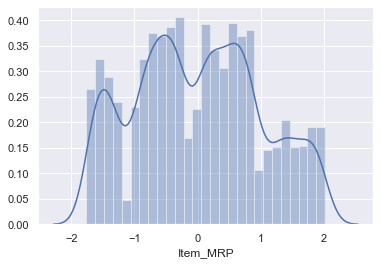

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

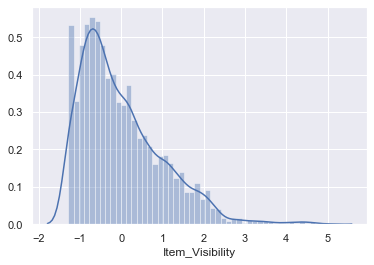

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

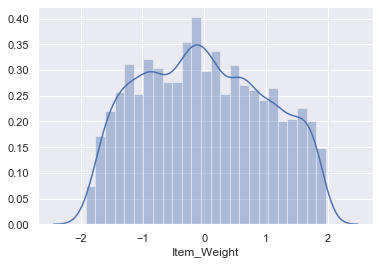

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

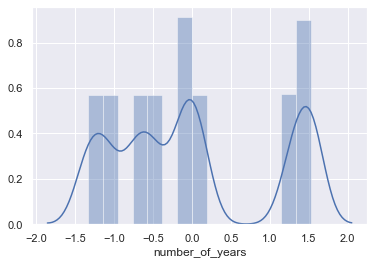

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

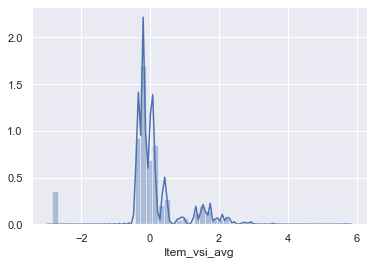

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

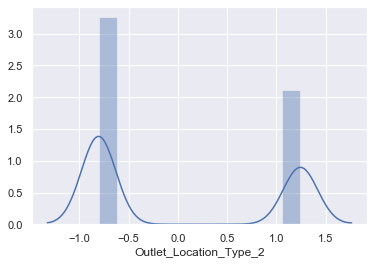

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

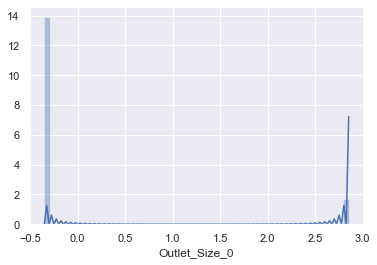

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

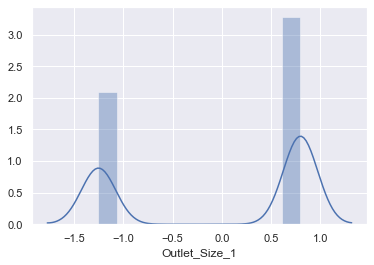

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

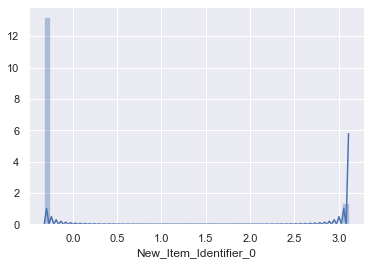

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

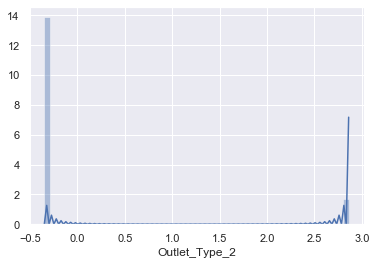

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

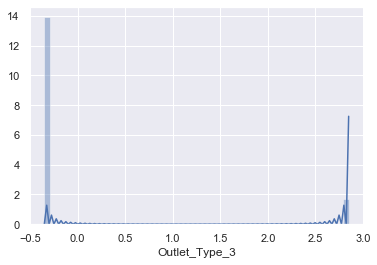

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

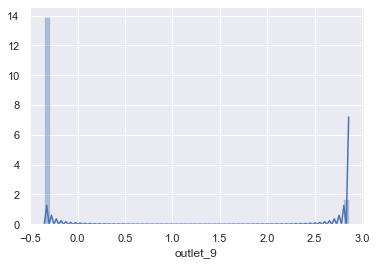

In [393]:
for i in x_new2.columns:
    
    sns.distplot(x_new[i])
    plt.show()

In [394]:
from sklearn.preprocessing import PowerTransformer   ## for normality in order to satisfy the inear model 

In [395]:
pt = PowerTransformer()

In [405]:
inp = pd.DataFrame(pt.fit_transform(x_new2) , columns = x_new2.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

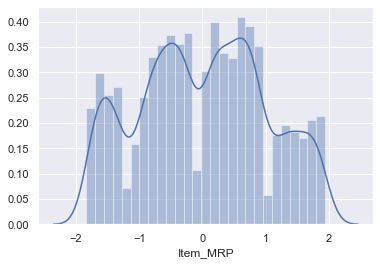

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

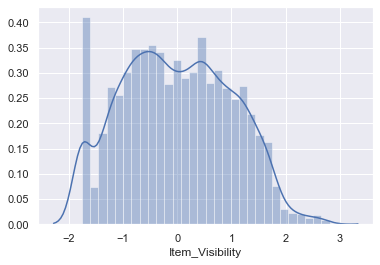

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

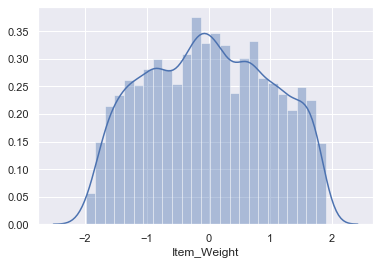

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

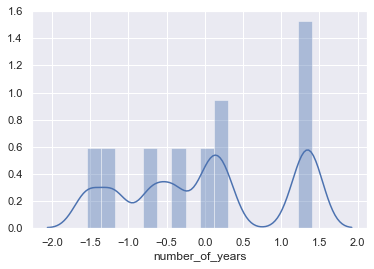

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

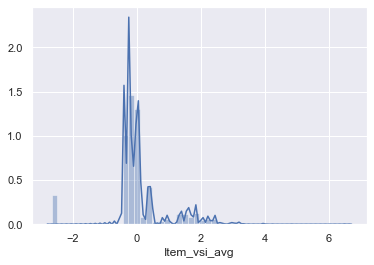

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

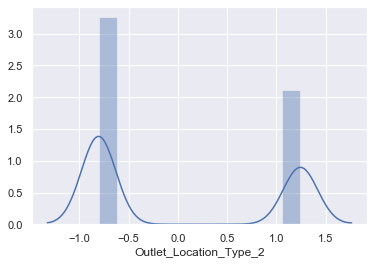

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

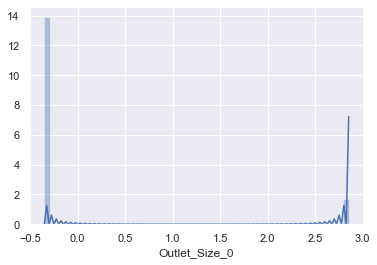

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

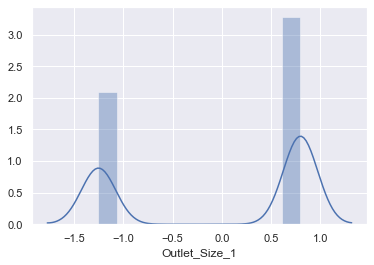

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

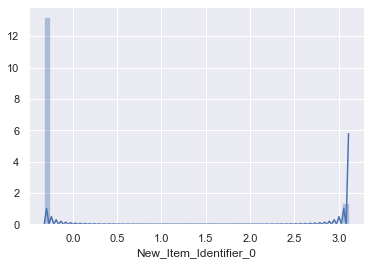

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

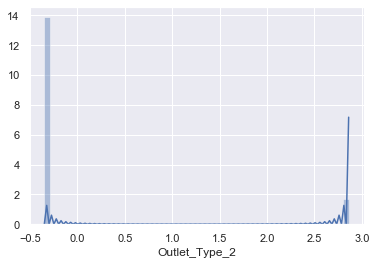

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

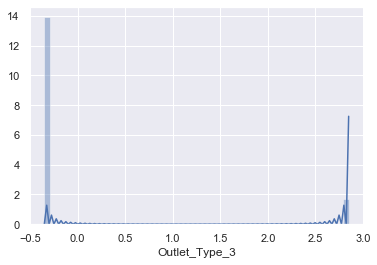

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

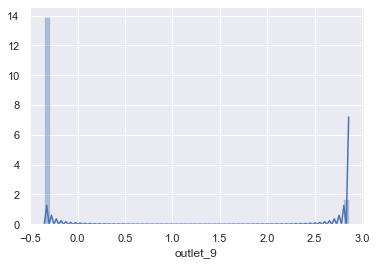

In [406]:
for i in inp.columns:
    
    sns.distplot(inp[i])
    plt.show()

In [411]:
# lets apply few models 
x2 = inp
y = df1['Item_Outlet_Sales']

In [415]:
x2.shape

(8523, 12)

In [418]:
inc =sm.add_constant(inp)
ols1 = sm.OLS(y , inc)
ols1_mod = ols1.fit()
ols1_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     855.6
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:04:57   Log-Likelihood:                -72150.
No. Observations:                8523   AIC:                         1.443e+05
Df Residuals:                    8510   BIC:                         1.444e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2181.2889     12.453    175.167      0.000    2156.879    2205.699
Item_MRP                 969.8918     12.476     77.741      0.000     945.436     994.348
Item_Visibility           -3.1664     14.047     -0.225      0.822     -30.701      24.368
Item_Weight               -2.8792     12.474     -0.231      0.817     -27.332      21.573
number_of_years         -721.9997     29.228    -24.702      0.000    -779.294    -664.706
Item_vsi_avg            -105.3969     16.725     -6.302      0.000    -138.181     -72.613
Outlet_Location_Type_2  -521.3368     31.006    -16.814      0.000    -582.116    -460.558
Outlet_Size_0            690.2632     24.918     27.702      0.000     641.419     739.108
Outlet_Size_1           -164.2824     21.370     -7.687      0.000    -206.173    -122.392
New_Item_Identifier_0     -6.2694     12.488     -0.502      0.616     -30.748      18.209
Outlet_Type_2             71.6950     24.065      2.979      0.003      24.522     118.868
Outlet_Type_3           1276.3056     25.637     49.784      0.000    1226.051    1326.560
outlet_9                 206.7480     16.209     12.755      0.000     174.975     238.521
==============================================================================
Omnibus:                      954.613   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2151.315
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                       5.051   Cond. No.                         5.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#lets drop Item_Visibility  and New_Item_Identifier_0 , Item_Weight  as their pvalues are greater then .05 

In [420]:
x3 = inp.drop(['Item_Visibility' , 'New_Item_Identifier_0' , 'Item_Weight' ] , axis = 1)
y = df1['Item_Outlet_Sales']

In [421]:
inc =sm.add_constant(x3)
ols2 = sm.OLS(y , inc)
ols2_mod = ols2.fit()
ols2_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1141.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:11:05   Log-Likelihood:                -72151.
No. Observations:                8523   AIC:                         1.443e+05
Df Residuals:                    8513   BIC:                         1.444e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2181.2889     12.451    175.194      0.000    2156.882    2205.695
Item_MRP                 970.1190     12.452     77.908      0.000     945.710     994.528
number_of_years         -721.6564     29.177    -24.734      0.000    -778.850    -664.463
Item_vsi_avg            -106.8710     15.136     -7.061      0.000    -136.542     -77.200
Outlet_Location_Type_2  -521.2268     30.979    -16.825      0.000    -581.953    -460.501
Outlet_Size_0            690.0125     24.869     27.746      0.000     641.263     738.762
Outlet_Size_1           -164.2052     21.363     -7.687      0.000    -206.081    -122.329
Outlet_Type_2             71.7144     24.057      2.981      0.003      24.557     118.871
Outlet_Type_3           1276.0855     25.570     49.906      0.000    1225.962    1326.209
outlet_9                 206.6023     16.199     12.754      0.000     174.849     238.356
==============================================================================
Omnibus:                      953.878   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2149.828
Skew:                           0.680   Prob(JB):                         0.00
Kurtosis:                       5.050   Cond. No.                         5.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# data has no autocorelation  , but r2 score is not that much good lets build  , non linear models

In [423]:
x_train , x_test , y_train ,y_test = train_test_split(inp , y , test_size =0.30 , random_state = 0)

<IPython.core.display.Javascript object>

In [424]:
rf2 = RandomForestRegressor(random_state =0)

In [425]:
rf2.fit(x_train  , y_train )

RandomForestRegressor(random_state=0)

In [427]:
rf2.score(x_train  , y_train )

0.9358607772705066

In [428]:
rf2.score(x_test , y_test )   ## as usal its giving us the same result even after applying variation inflation factor and removing Feature

0.5389089793929942

In [ ]:
## LETS APPLY PCA (principal component analysis)

In [429]:
x_new.describe()  ## scaled data

,Item_MRP,Item_Visibility,Item_Weight,number_of_years,Item_vsi_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,outlet_0,outlet_1,outlet_2,outlet_3,outlet_4,outlet_5,outlet_6,outlet_7,outlet_8,outlet_9
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,...,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,-1.637654e-16,1.822365e-16,2.457002e-16,-1.060886e-16,-4.299558e-16,-1.396956e-15,-1.304965e-15,1.107800e-15,7.751110e-16,6.850739e-16,...,-2.874492e-16,-7.557280e-16,2.459868e-16,9.115539e-16,4.466423e-16,4.388657e-16,-1.208128e-15,-6.235772e-16,-8.786953e-16,-7.711901e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,...,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.761688e+00,-1.281758e+00,-1.916029e+00,-1.334103e+00,-2.853228e+00,-9.223960e-01,-4.805579e-01,-7.381472e-01,-6.238927e-01,-6.966784e-01,...,-2.639197e-01,-3.503955e-01,-3.491278e-01,-3.495506e-01,-2.569850e-01,-3.510283e-01,-3.499732e-01,-3.497619e-01,-3.499732e-01,-3.499732e-01
25%,-7.574307e-01,-7.586531e-01,-8.275817e-01,-7.368218e-01,-2.256709e-01,-9.223960e-01,-4.805579e-01,-7.381472e-01,-6.238927e-01,-6.966784e-01,...,-2.639197e-01,-3.503955e-01,-3.491278e-01,-3.495506e-01,-2.569850e-01,-3.510283e-01,-3.499732e-01,-3.497619e-01,-3.499732e-01,-3.499732e-01
50%,3.243893e-02,-2.364792e-01,-5.668958e-02,-1.395408e-01,-1.151616e-01,-9.223960e-01,-4.805579e-01,-7.381472e-01,-6.238927e-01,-6.966784e-01,...,-2.639197e-01,-3.503955e-01,-3.491278e-01,-3.495506e-01,-2.569850e-01,-3.510283e-01,-3.499732e-01,-3.497619e-01,-3.499732e-01,-3.499732e-01
75%,7.170372e-01,5.514755e-01,7.868890e-01,1.293934e+00,1.159404e-01,1.084133e+00,-4.805579e-01,1.354743e+00,1.602840e+00,1.435383e+00,...,-2.639197e-01,-3.503955e-01,-3.491278e-01,-3.495506e-01,-2.569850e-01,-3.510283e-01,-3.499732e-01,-3.497619e-01,-3.499732e-01,-3.499732e-01
max,2.021724e+00,5.083050e+00,1.965588e+00,1.532846e+00,5.723998e+00,1.084133e+00,2.080915e+00,1.354743e+00,1.602840e+00,1.435383e+00,...,3.789031e+00,2.853918e+00,2.864281e+00,2.860816e+00,3.891278e+00,2.848773e+00,2.857362e+00,2.859087e+00,2.857362e+00,2.857362e+00


In [430]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_new)

PCA()

In [432]:
pca.explained_variance_ratio_

array([1.42000213e-01, 1.23837484e-01, 1.00723428e-01, 9.71272324e-02,
       8.04302911e-02, 7.42665464e-02, 6.52396837e-02, 6.19383390e-02,
       3.87297877e-02, 3.64780208e-02, 3.63496221e-02, 3.60443554e-02,
       3.16003125e-02, 3.12051484e-02, 2.91090119e-02, 1.49205236e-02,
       1.58446004e-32, 1.17830072e-32, 3.62692542e-33, 3.51944404e-33,
       3.17423515e-33, 1.94395688e-33, 1.60199319e-33, 1.11287324e-33,
       8.78328611e-34, 8.78328611e-34, 8.78328611e-34, 8.78328611e-34,
       5.71501905e-34, 5.69960542e-34, 4.69958742e-34])

In [437]:
# now lets look at explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=.99)+1   ## for 95% explanation of variable  how may pca we are going to need
d
## so total of 14 pca can explain 95% of variance  and 16 pca can explain 99 % of variance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

16

In [438]:
cumsum

array([0.14200021, 0.2658377 , 0.36656112, 0.46368836, 0.54411865,
       0.61838519, 0.68362488, 0.74556322, 0.78429301, 0.82077103,
       0.85712065, 0.893165  , 0.92476532, 0.95597046, 0.98507948,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [ ]:
### lets take these 16 pca variable and build model

In [439]:
pca = PCA(n_components = 16)
x_red  = pca.fit_transform(x_new)

In [ ]:
# now lets build the model

In [441]:
xgr1 = XGBRegressor(random_state =1)

In [442]:
x_red.shape

(8523, 16)

In [ ]:
x = x_red
y  = y ## we have define y earlier

In [443]:
x_train1 , x_test1 , y_train1 ,y_test1 = train_test_split(x , y , test_size =0.30 , random_state = 0)

<IPython.core.display.Javascript object>

In [444]:
xgr1.fit(x_train1 , y_train1)   

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [445]:
xgr1.score(x_train1 , y_train1)

0.8866268089274086

In [446]:
xgr1.score(x_test1 , y_test1)

0.5238780642702314

In [447]:
ny = np.log(y)

<IPython.core.display.Javascript object>

In [448]:
x_train2 , x_test2 , y_train2 ,y_test2 = train_test_split(x_new2 , ny , test_size =0.30 , random_state = 0)

<IPython.core.display.Javascript object>

In [449]:
xgr2 = XGBRegressor(random_state =0)

In [450]:
xgr2.fit(x_train2 , y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [451]:
xgr2.score(x_train2 ,y_train2)

0.9022491083409766

In [452]:
xgr2.score(x_test2 , y_test2)  ## scores are improves from our previous  socres lets try to imporve it further

0.687157123952513

In [ ]:
##

In [456]:
## scores have been improved after doing log transformation  on output variable
inpc = sm.add_constant(x_new2 )
ols = sm.OLS(ny , inpc) 
ols_mod3 = ols.fit()
ols_mod3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1543.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:11:16   Log-Likelihood:                -7313.4
No. Observations:                8523   AIC:                         1.465e+04
Df Residuals:                    8510   BIC:                         1.474e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.2965      0.006   1179.397      0.000       7.284       7.309
Item_MRP                   0.5177      0.006     83.526      0.000       0.506       0.530
Item_Visibility           -0.0078      0.007     -1.145      0.252      -0.021       0.006
Item_Weight               -0.0040      0.006     -0.647      0.518      -0.016       0.008
number_of_years           -0.7579      0.014    -53.360      0.000      -0.786      -0.730
Item_vsi_avg              -0.0631      0.008     -7.991      0.000      -0.079      -0.048
Outlet_Location_Type_2    -0.6135      0.015    -41.064      0.000      -0.643      -0.584
Outlet_Size_0              0.7872      0.012     63.028      0.000       0.763       0.812
Outlet_Size_1             -0.1435      0.010    -13.852      0.000      -0.164      -0.123
New_Item_Identifier_0     -0.0057      0.006     -0.919      0.358      -0.018       0.006
Outlet_Type_2              0.2110      0.011     19.031      0.000       0.189       0.233
Outlet_Type_3              1.1125      0.013     83.757      0.000       1.086       1.139
outlet_9                   0.1678      0.008     21.709      0.000       0.153       0.183
==============================================================================
Omnibus:                      567.893   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.327
Skew:                          -0.637   Prob(JB):                    1.54e-154
Kurtosis:                       3.611   Cond. No.                         5.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [455]:
##x_new2.describe()  # already scaled

In [463]:
x_new2.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'number_of_years',
       'Item_vsi_avg', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'New_Item_Identifier_0', 'Outlet_Type_2',
       'Outlet_Type_3', 'outlet_9'],
      dtype='object')

In [468]:
ni = X[[ 'Item_MRP', 'Item_Visibility', 'Item_Weight', 'number_of_years',
       'Item_vsi_avg', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'New_Item_Identifier_0', 'Outlet_Type_2',
       'Outlet_Type_3', 'outlet_9']]

In [481]:
sc2 = StandardScaler()

In [482]:
nis = pd.DataFrame(sc2.fit_transform(ni) , columns = ni.columns)

<IPython.core.display.Javascript object>

In [496]:
y = df1['Item_Outlet_Sales']

In [498]:
sc3 = StandardScaler()

In [504]:
inpc = sm.add_constant(ni )   ## here out put varible has log transformation while input varible is normal 
ols = sm.OLS(ny , inpc ) 
ols_mod4 = ols.fit()
ols_mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1543.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:53:11   Log-Likelihood:                -7313.4
No. Observations:                8523   AIC:                         1.465e+04
Df Residuals:                    8510   BIC:                         1.474e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.2139      0.035    204.297      0.000       7.145       7.283
Item_MRP                   0.0083   9.95e-05     83.526      0.000       0.008       0.009
Item_Visibility           -0.1516      0.132     -1.145      0.252      -0.411       0.108
Item_Weight               -0.0009      0.001     -0.647      0.518      -0.004       0.002
number_of_years           -0.0905      0.002    -53.360      0.000      -0.094      -0.087
Item_vsi_avg              -0.1799      0.023     -7.991      0.000      -0.224      -0.136
Outlet_Location_Type_2    -1.2561      0.031    -41.064      0.000      -1.316      -1.196
Outlet_Size_0              2.5226      0.040     63.028      0.000       2.444       2.601
Outlet_Size_1             -0.2943      0.021    -13.852      0.000      -0.336      -0.253
New_Item_Identifier_0     -0.0196      0.021     -0.919      0.358      -0.061       0.022
Outlet_Type_2              0.6774      0.036     19.031      0.000       0.608       0.747
Outlet_Type_3              3.5598      0.043     83.757      0.000       3.476       3.643
outlet_9                   0.5382      0.025     21.709      0.000       0.490       0.587
==============================================================================
Omnibus:                      567.893   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.327
Skew:                          -0.637   Prob(JB):                    1.54e-154
Kurtosis:                       3.611   Cond. No.                     3.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## non linear test on normal data and log transformed data

In [507]:
ni.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'number_of_years',
       'Item_vsi_avg', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'New_Item_Identifier_0', 'Outlet_Type_2',
       'Outlet_Type_3', 'outlet_9'],
      dtype='object')

In [524]:
x_train3 , x_test3 , y_train3 ,y_test3 = train_test_split(ni , ny , test_size =0.30 , random_state = 0)

<IPython.core.display.Javascript object>

In [525]:
xgr3 = XGBRegressor(random_state  = 0)

In [526]:
xgr3.fit(x_train3  , y_train3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [527]:
xgr3.score(x_train3  , y_train3)

0.8945880768638997

In [528]:
xgr3.score(x_test3  , y_test3)  ## test score is quite low high chances of variance error

0.6888457162352467

In [ ]:
#### lets apply ridge modal to  examine test , train score and rmse of our modal on the basis of new input

In [541]:
rid = Ridge(alpha=1)  ## for alpha =1  it is giving the est value 
rid.fit(x_train3 , y_train3)
rypred_train  = rid.predict(x_train3)
rypred_test = rid.predict(x_test3)
## rmse on ridge  model
rmse_train = np.sqrt(mean_squared_error(y_train3 , rypred_train))
rmse_test = np.sqrt(mean_squared_error(y_test3 , rypred_test))
# rsquare on ridge modal
r2_train  = r2_score(y_train3 , rypred_train)
r2_test = r2_score(y_test3 , rypred_test)
res_rid = [rmse_train , rmse_test , r2_train , r2_test]
res_rid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.5663010313574082,
 0.5816928007824154,
 0.6868725944908508,
 0.6802396670738188]

In [542]:
## lets apply lasso model on the same input 

In [559]:
las = Lasso(alpha=0.0001)  ## for alpha =1  it is giving the est value 
las.fit(x_train3 , y_train3)
lapred_train  = las.predict(x_train3)
lapred_test = las.predict(x_test3)
## rmse on ridge  model
rmse_train = np.sqrt(mean_squared_error(y_train3 , lapred_train))
rmse_test = np.sqrt(mean_squared_error(y_test3 , lapred_test))
# rsquare on ridge modal
r2_train  = r2_score(y_train3 , lapred_train)
r2_test = r2_score(y_test3 , lapred_test)
las_rid = [rmse_train , rmse_test , r2_train , r2_test]
las_rid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.5662640997827596, 0.5815121640005828, 0.6869134346462653, 0.680438230676651]

#### THIS IS THE BEST SCORE WE CAN GET  , HENCE LASSO OR RIDGE MODEL  WITH UNSCALED INPUT AND LOG TRANSFORMATION ON OUTPUT ARE PROVIDING THE BEST RESULT TILL  NOW